In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#read file
df=pd.read_csv('/content/InsuranceData.csv')

In [7]:
df.head(5)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,PolicyNumber,CustomerID,Gender,Age,PolicyType,PolicyStartDate,PolicyEndDate,PremiumAmount,CoverageAmount,ClaimNumber,ClaimDate,ClaimAmount,ClaimStatus
0,P1,C1,Female,73,Auto,13-02-2024,13-02-2025,240.64,33175.10,C1,NaN,0.00,Rejected
1,P2,C2,Male,44,Travel,03-03-2024,03-03-2025,1059.73,85046.42,C2,22-06-2024,1493.06,Pending
2,P3,C3,Female,28,Travel,15-06-2024,15-06-2025,1019.59,68525.53,C3,NaN,0.00,Rejected
3,P4,C4,Male,85,Travel,03-06-2024,03-06-2025,549.70,17053.27,C4,25-02-2025,5021.34,Pending
4,P5,C5,Female,57,Travel,13-06-2024,13-06-2025,841.15,55007.27,C5,30-11-2024,1347.46,Pending


In [8]:
df.tail(5)

,PolicyNumber,CustomerID,Gender,Age,PolicyType,PolicyStartDate,PolicyEndDate,PremiumAmount,CoverageAmount,ClaimNumber,ClaimDate,ClaimAmount,ClaimStatus
9999,P10000,C10000,Male,44,Life,31-07-2023,31-07-2024,210.96,104709.99,C10000,10-04-2024,2092.75,Settled
10000,P1,C1,Female,73,Auto,13-02-2024,13-02-2025,240.64,33175.10,C1,NaN,0.00,Rejected
10001,P2,C2,Male,44,Travel,03-03-2024,03-03-2025,1059.73,85046.42,C2,22-06-2024,1493.06,Pending
10002,P2,C2,Male,44,Travel,03-03-2024,03-03-2025,1059.73,85046.42,C2,22-06-2024,1493.06,Pending
10003,P4,C4,Male,85,Travel,03-06-2024,03-06-2025,549.70,17053.27,C4,25-02-2025,5021.34,Pending


In [9]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PolicyNumber     10004 non-null  object 
 1   CustomerID       10004 non-null  object 
 2   Gender           10004 non-null  object 
 3   Age              10004 non-null  int64  
 4   PolicyType       10004 non-null  object 
 5   PolicyStartDate  10004 non-null  object 
 6   PolicyEndDate    10004 non-null  object 
 7   PremiumAmount    10004 non-null  float64
 8   CoverageAmount   10004 non-null  float64
 9   ClaimNumber      10004 non-null  object 
 10  ClaimDate        5649 non-null   object 
 11  ClaimAmount      10004 non-null  float64
 12  ClaimStatus      10004 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1016.2+ KB


In [11]:
#check duplicates
df.nunique()

,0
PolicyNumber,10000
CustomerID,10000
Gender,2
Age,70
PolicyType,5
PolicyStartDate,365
PolicyEndDate,364
PremiumAmount,9512
CoverageAmount,9994
ClaimNumber,10000


In [12]:
#checking missing values
df.isnull().sum()

,0
PolicyNumber,0
CustomerID,0
Gender,0
Age,0
PolicyType,0
PolicyStartDate,0
PolicyEndDate,0
PremiumAmount,0
CoverageAmount,0
ClaimNumber,0


In [13]:
# percentage of missing values
(df.isnull().sum()/(len(df)))*100

,0
PolicyNumber,0.000000
CustomerID,0.000000
Gender,0.000000
Age,0.000000
PolicyType,0.000000
PolicyStartDate,0.000000
PolicyEndDate,0.000000
PremiumAmount,0.000000
CoverageAmount,0.000000
ClaimNumber,0.000000


In [16]:
#remove PolicyNumber ,CustomerID column
df.drop(['PolicyNumber','CustomerID'],axis=1,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10004 non-null  object 
 1   Age              10004 non-null  int64  
 2   PolicyType       10004 non-null  object 
 3   PolicyStartDate  10004 non-null  object 
 4   PolicyEndDate    10004 non-null  object 
 5   PremiumAmount    10004 non-null  float64
 6   CoverageAmount   10004 non-null  float64
 7   ClaimNumber      10004 non-null  object 
 8   ClaimDate        5649 non-null   object 
 9   ClaimAmount      10004 non-null  float64
 10  ClaimStatus      10004 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 859.8+ KB


In [20]:
df.PolicyType.unique()

array(['Auto', 'Travel', 'Health', 'Home', 'Life'], dtype=object)

In [21]:
df.ClaimNumber.unique()

array(['C1', 'C2', 'C3', ..., 'C9998', 'C9999', 'C10000'], dtype=object)

In [23]:
df.drop(['ClaimNumber'],axis=1,inplace=True)

In [24]:
df.ClaimStatus.unique()

array(['Rejected', 'Pending', 'Settled'], dtype=object)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10004 non-null  object 
 1   Age              10004 non-null  int64  
 2   PolicyType       10004 non-null  object 
 3   PolicyStartDate  10004 non-null  object 
 4   PolicyEndDate    10004 non-null  object 
 5   PremiumAmount    10004 non-null  float64
 6   CoverageAmount   10004 non-null  float64
 7   ClaimDate        5649 non-null   object 
 8   ClaimAmount      10004 non-null  float64
 9   ClaimStatus      10004 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 781.7+ KB


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10004.0,52.342363,20.303034,18.00,35.0000,52.000,70.0000,87.00
PremiumAmount,10004.0,597.458005,288.289533,100.02,348.7300,596.570,848.4975,1099.70
CoverageAmount,10004.0,60031.137312,28857.815937,10020.27,35112.0925,60126.795,85082.6750,109992.31
ClaimAmount,10004.0,1690.554051,1841.771853,0.00,0.0000,1073.280,3236.7600,5499.25


In [29]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,10004,2,Male,5003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10004.0,NaN,NaN,NaN,52.342363,20.303034,18.0,35.0,52.0,70.0,87.0
PolicyType,10004,5,Travel,4148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PolicyStartDate,10004,365,25-01-2024,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PolicyEndDate,10004,364,28-02-2025,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PremiumAmount,10004.0,NaN,NaN,NaN,597.458005,288.289533,100.02,348.73,596.57,848.4975,1099.7
CoverageAmount,10004.0,NaN,NaN,NaN,60031.137312,28857.815937,10020.27,35112.0925,60126.795,85082.675,109992.31
ClaimDate,5649,677,20-06-2024,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimAmount,10004.0,NaN,NaN,NaN,1690.554051,1841.771853,0.0,0.0,1073.28,3236.76,5499.25
ClaimStatus,10004,3,Rejected,4355,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
cat_cols=df.select_dtypes(include='object').columns
num_cols=df.select_dtypes(include='number').columns.tolist()
print(cat_cols)
print(num_cols)

Index(['Gender', 'PolicyType', 'PolicyStartDate', 'PolicyEndDate', 'ClaimDate',
       'ClaimStatus'],
      dtype='object')
['Age', 'PremiumAmount', 'CoverageAmount', 'ClaimAmount']


Age
skew : 0.02


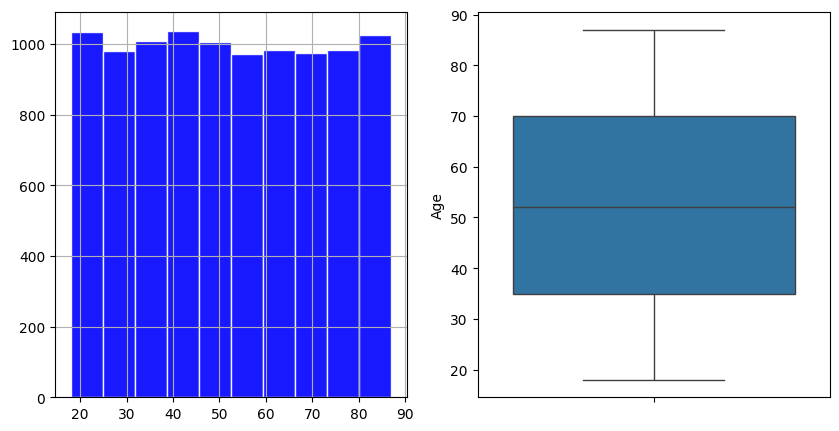

PremiumAmount
skew : 0.01


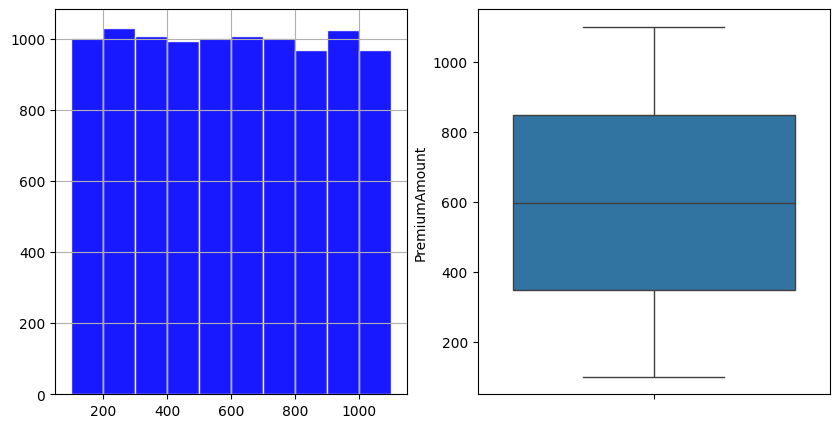

CoverageAmount
skew : -0.01


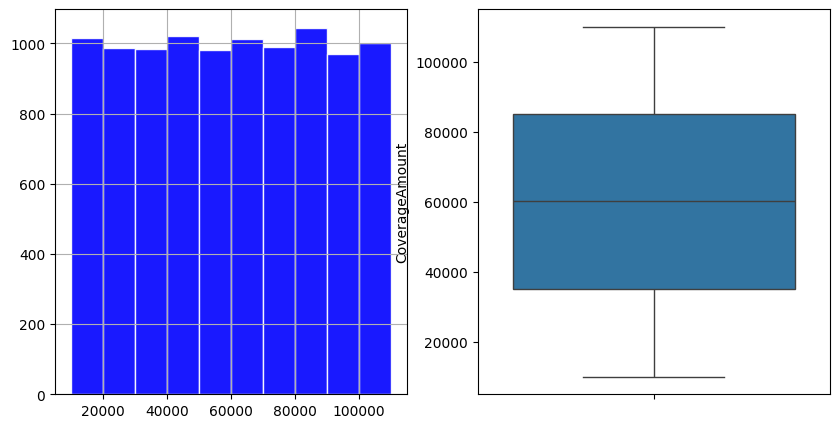

ClaimAmount
skew : 0.61


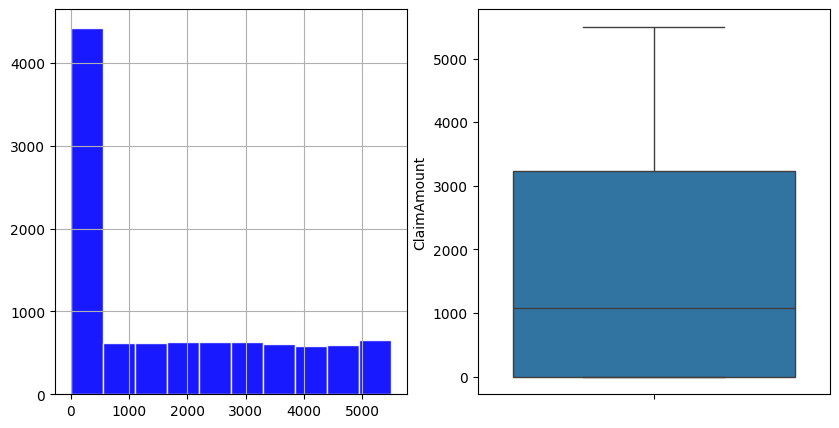

In [42]:
# visualization

for col in num_cols:
  print(col)
  print('skew :',round(df[col].skew(),2))
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  df[col].hist(grid=True,bins=10,color='Blue',edgecolor='White',alpha=0.9)
  plt.subplot(1,2,2)
  sns.boxplot(df[col])
  plt.show()

In [43]:
# Function for log transformation of the column
def log_transform(df,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(df[colname]+1)
        else:
            data[colname + '_log'] = np.log(df[colname])
    data.info()



In [44]:
log_transform(data,['ClaimAmount'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PolicyNumber     10004 non-null  object 
 1   CustomerID       10004 non-null  object 
 2   Gender           10004 non-null  object 
 3   Age              10004 non-null  int64  
 4   PolicyType       10004 non-null  object 
 5   PolicyStartDate  10004 non-null  object 
 6   PolicyEndDate    10004 non-null  object 
 7   PremiumAmount    10004 non-null  float64
 8   CoverageAmount   10004 non-null  float64
 9   ClaimNumber      10004 non-null  object 
 10  ClaimDate        5649 non-null   object 
 11  ClaimAmount      10004 non-null  float64
 12  ClaimStatus      10004 non-null  object 
 13  ClaimAmount_log  10004 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 1.1+ MB


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<ipython-input-45-8eafd7cd5352>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["ClaimAmount"], axlabel="ClaimAmount");


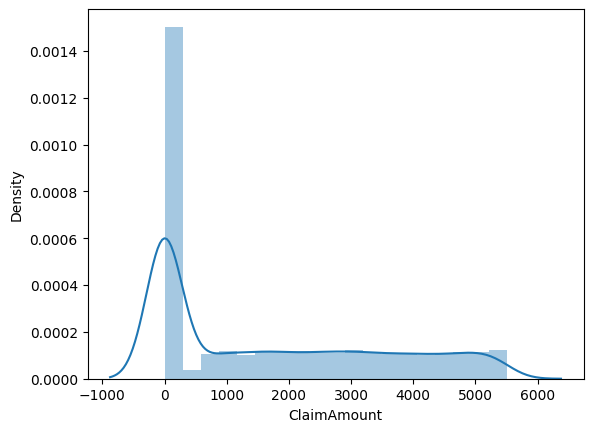

In [45]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data["ClaimAmount"], axlabel="ClaimAmount");

<Axes: >

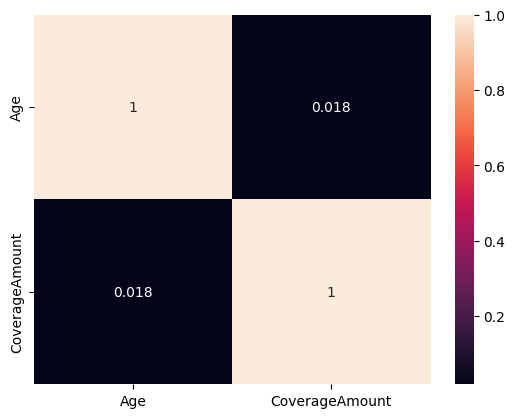

In [60]:
sns.heatmap(df.select_dtypes(include='number').drop(['ClaimAmount','PremiumAmount'],axis=1).corr(),annot=True)

In [61]:
df.isnull().sum()


,0
Gender,0
Age,0
PolicyType,0
PolicyStartDate,0
PolicyEndDate,0
PremiumAmount,0
CoverageAmount,0
ClaimDate,4355
ClaimAmount,0
ClaimStatus,0


In [62]:
#remove ClaimDate
df.drop(['ClaimDate'],axis=1,inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10004 non-null  object 
 1   Age              10004 non-null  int64  
 2   PolicyType       10004 non-null  object 
 3   PolicyStartDate  10004 non-null  object 
 4   PolicyEndDate    10004 non-null  object 
 5   PremiumAmount    10004 non-null  float64
 6   CoverageAmount   10004 non-null  float64
 7   ClaimAmount      10004 non-null  float64
 8   ClaimStatus      10004 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 703.5+ KB


In [ ]:
# Conclusion of EDA:
# Data loaded and cleaned, removing irrelevant IDs and handling missing values.
# Numerical features analyzed for distribution, skewness, and outliers.
# Log transformation applied to ClaimAmount, and correlation explored via heatmap.
# Next steps: Analyze and encode categorical data, handle remaining missing values, and prepare for modeling.